In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.shape

(59946, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [7]:
print(df.sign.nunique())
print(df.sign.unique())

48
['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'
 's

In [8]:
df['signscleaned'] = df.sign.str.split().str.get(0)
print(df.signscleaned.nunique())
print(df.signscleaned.unique())

df.signscleaned.value_counts()

12
['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signscleaned, dtype: int64

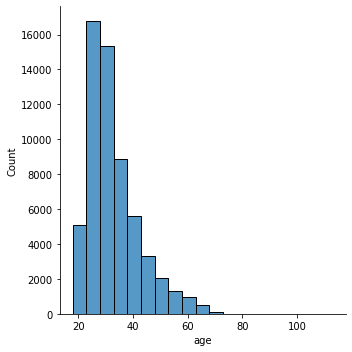

In [9]:
sns.displot(data = df, x = 'age', binwidth = 5, kind = 'hist')

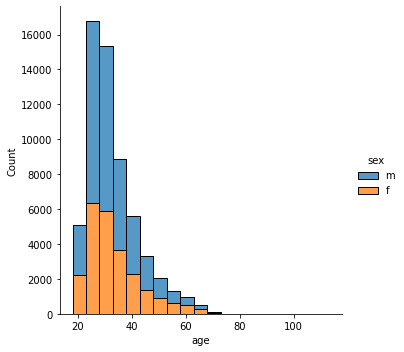

In [10]:
sns.displot(data=df, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack")

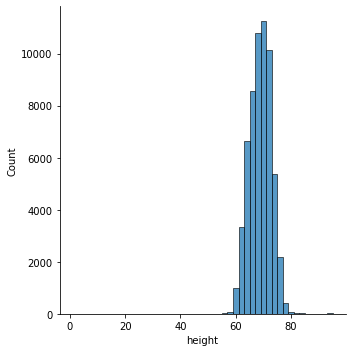

In [11]:
sns.displot(data=df, x="height", kind="hist", binwidth = 2)

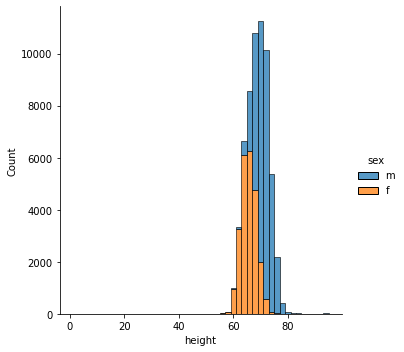

In [12]:
sns.displot(data=df, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack")

In [13]:
print(df.income.nunique())
print(df.income.unique())

df.income.value_counts()

13
[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]


-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

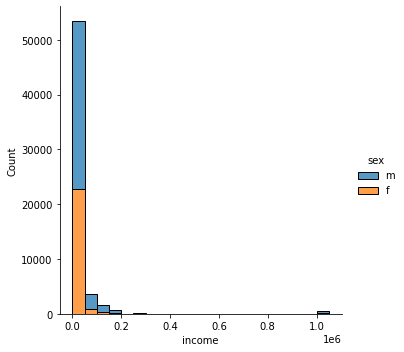

In [14]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")

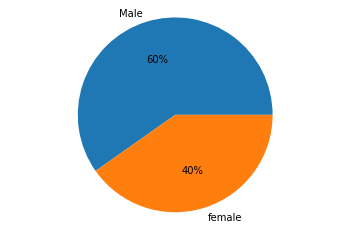

In [15]:
sex = df.sex.value_counts()
plt.pie(sex, labels=['Male','female'], autopct='%.0f%%')
plt.axis('equal')
plt.show()

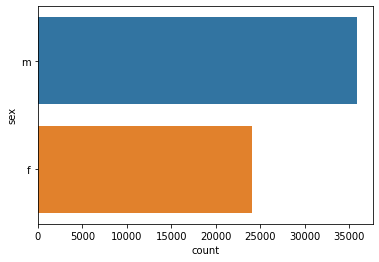

In [16]:
sns.countplot(data=df, y="sex")
plt.show()

<AxesSubplot:xlabel='count', ylabel='body_type'>

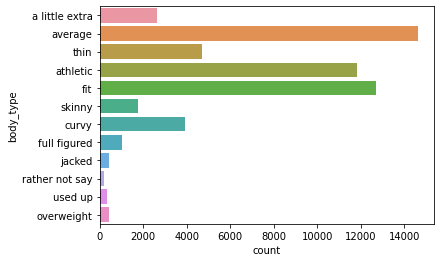

In [17]:
sns.countplot(data=df, y="body_type")

<AxesSubplot:xlabel='count', ylabel='body_type'>

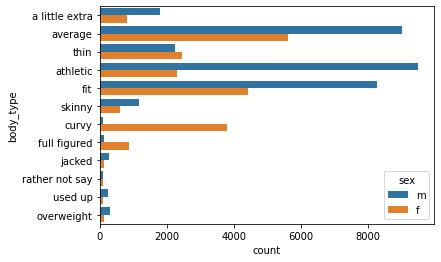

In [18]:
sns.countplot(data=df, y="body_type", hue = "sex")

<AxesSubplot:xlabel='count', ylabel='diet'>

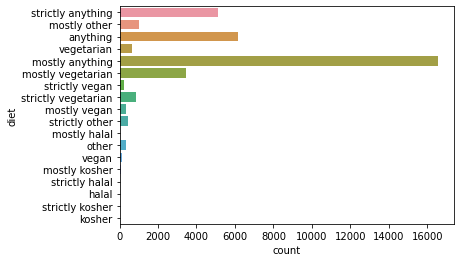

In [19]:
sns.countplot(data=df, y="diet")

<AxesSubplot:xlabel='count', ylabel='drinks'>

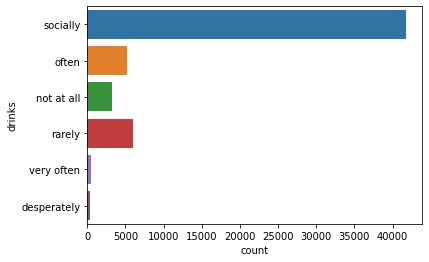

In [20]:
sns.countplot(data=df, y="drinks")

<AxesSubplot:xlabel='count', ylabel='drugs'>

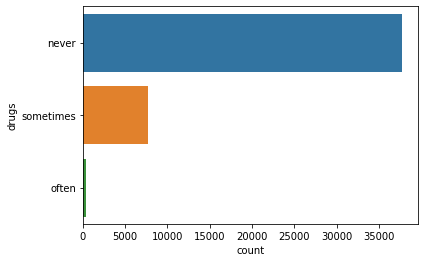

In [21]:
sns.countplot(data=df, y="drugs")

<AxesSubplot:xlabel='count', ylabel='education'>

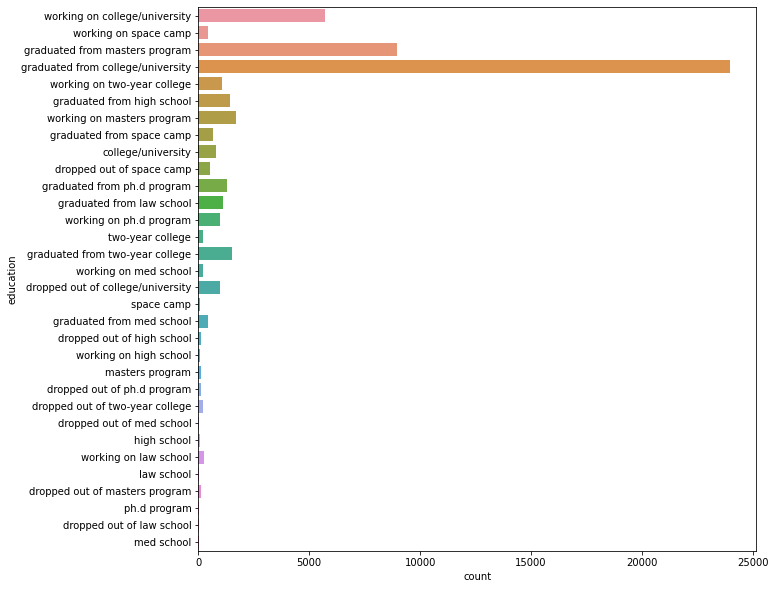

In [22]:
plt.figure(figsize=(10,10))

sns.countplot(data=df, y="education")

<AxesSubplot:xlabel='count', ylabel='job'>

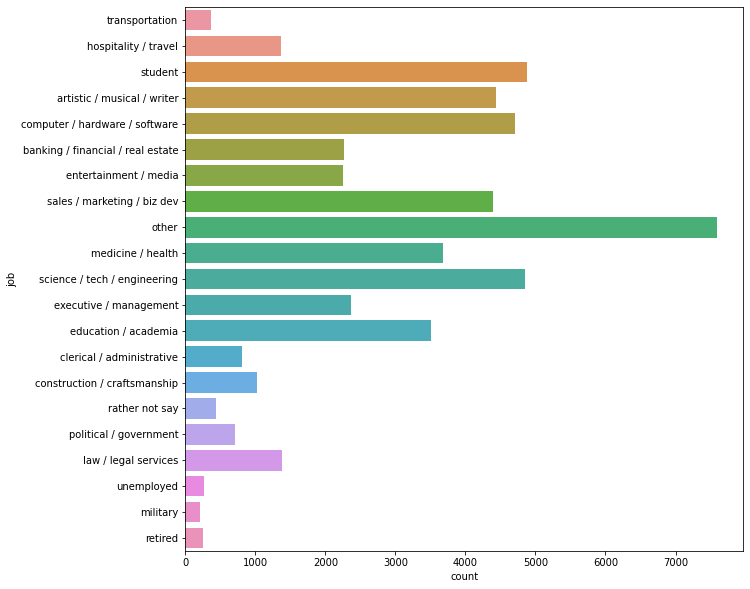

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y="job")

<AxesSubplot:xlabel='count', ylabel='offspring'>

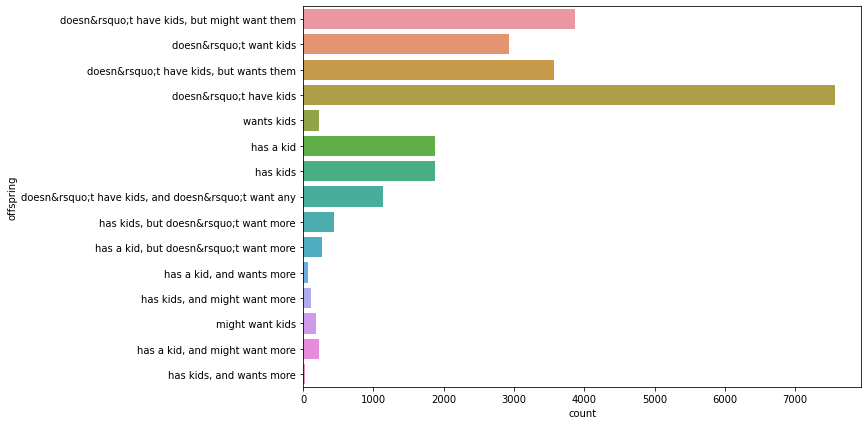

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, y="offspring")

<AxesSubplot:xlabel='count', ylabel='orientation'>

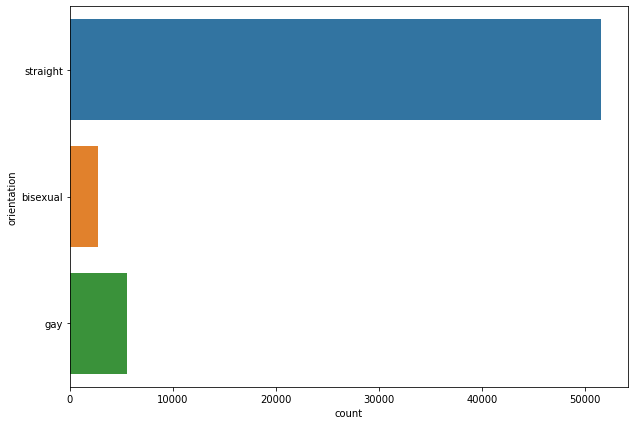

In [25]:
plt.figure(figsize=(10,7))

sns.countplot(data=df, y="orientation")

<AxesSubplot:xlabel='count', ylabel='orientation'>

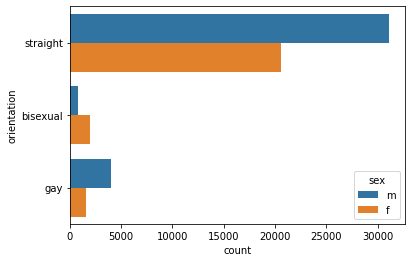

In [26]:
sns.countplot(data=df, y="orientation", hue = "sex")

<AxesSubplot:xlabel='count', ylabel='pets'>

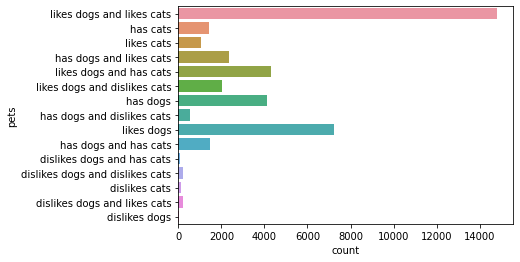

In [27]:
sns.countplot(data=df, y="pets")

<AxesSubplot:xlabel='count', ylabel='religion'>

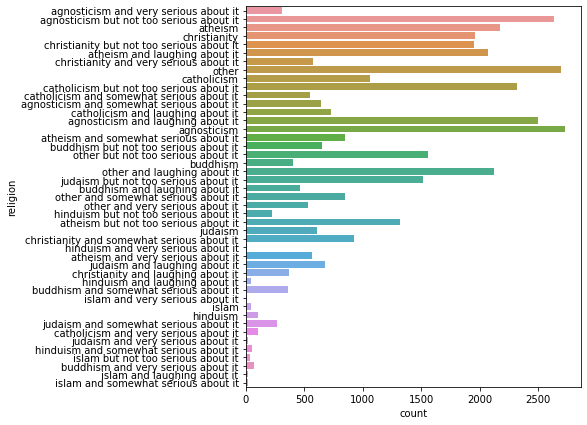

In [28]:
plt.figure(figsize=(6,7))
sns.countplot(data=df, y="religion")

<AxesSubplot:xlabel='count', ylabel='religionCleaned'>

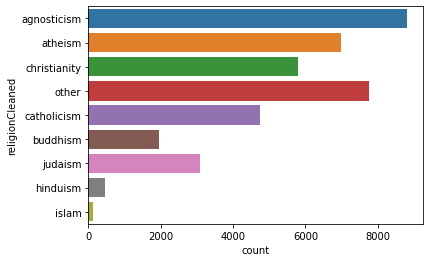

In [29]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned")

<AxesSubplot:xlabel='count', ylabel='signscleaned'>

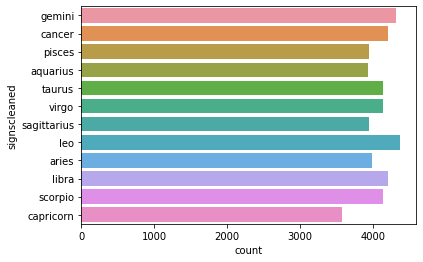

In [30]:
sns.countplot(data=df, y="signscleaned")

<AxesSubplot:xlabel='count', ylabel='smokes'>

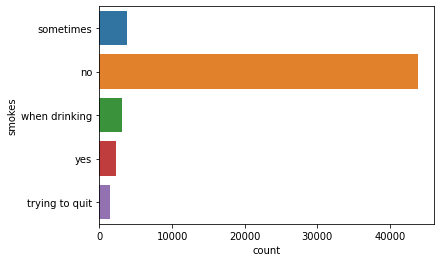

In [31]:
sns.countplot(data=df, y="smokes")

<AxesSubplot:xlabel='count', ylabel='status'>

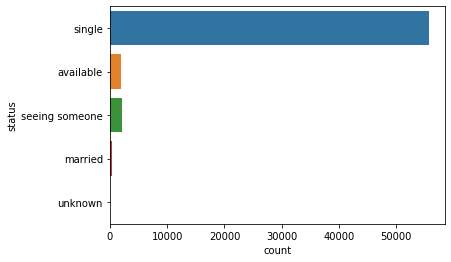

In [32]:
sns.countplot(data=df, y="status")

### preprocessing

In [36]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signscleaned']
df = df[cols].dropna()
df.shape

(16453, 8)

In [37]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [39]:
df.signscleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signscleaned, dtype: int64

In [40]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]



#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size= .20, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.12      0.08      0.09      1031
       aries       0.11      0.08      0.10      1043
      cancer       0.13      0.22      0.16      1190
   capricorn       0.12      0.04      0.06       952
      gemini       0.12      0.13      0.12      1200
         leo       0.12      0.20      0.15      1208
       libra       0.12      0.09      0.11      1090
      pisces       0.11      0.07      0.09      1059
 sagittarius       0.13      0.10      0.12      1051
     scorpio       0.13      0.05      0.07      1072
      taurus       0.13      0.12      0.12      1102
       virgo       0.12      0.22      0.16      1164

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(lr_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08887201 0.08507406 0.09156535 0.0881459  0.09346505]
Baseline: 8.94% (0.29%)


### KNN

In [48]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.66      0.37      1031
       aries       0.27      0.53      0.36      1043
      cancer       0.30      0.43      0.35      1190
   capricorn       0.31      0.33      0.32       952
      gemini       0.35      0.30      0.32      1200
         leo       0.40      0.28      0.33      1208
       libra       0.37      0.27      0.31      1090
      pisces       0.41      0.24      0.31      1059
 sagittarius       0.41      0.21      0.28      1051
     scorpio       0.41      0.23      0.30      1072
      taurus       0.41      0.23      0.29      1102
       virgo       0.41      0.26      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



In [49]:

results_kn = cross_val_score(knn_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results_kn)
print("Baseline: %.2f%% (%.2f%%)" % (results_kn.mean()*100, results_kn.std()*100))

[0.08469427 0.08393468 0.08244681 0.09042553 0.08358663]
Baseline: 8.50% (0.28%)


### Decision Trees

In [51]:
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train)

print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



In [53]:
cart_model.get_depth()

58

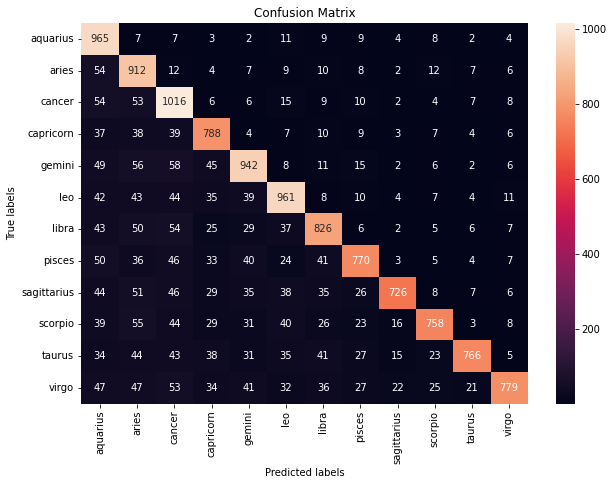

In [54]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_


plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [56]:
results_kn = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results_kn)
print("Baseline: %.2f%% (%.2f%%)" % (results_kn.mean()*100, results_kn.std()*100))

[0.08773262 0.09456893 0.09840426 0.08472644 0.07902736]
Baseline: 8.89% (0.69%)


In [57]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train)

In [59]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.45      0.39      0.42      1031
       aries       0.57      0.38      0.46      1043
      cancer       0.42      0.42      0.42      1190
   capricorn       0.54      0.37      0.44       952
      gemini       0.27      0.49      0.35      1200
         leo       0.31      0.50      0.38      1208
       libra       0.38      0.33      0.35      1090
      pisces       0.39      0.34      0.37      1059
 sagittarius       0.50      0.34      0.40      1051
     scorpio       0.34      0.35      0.34      1072
      taurus       0.41      0.33      0.37      1102
       virgo       0.37      0.33      0.35      1164

    accuracy                           0.38     13162
   macro avg       0.41      0.38      0.39     13162
weighted avg       0.41      0.38      0.39     13162



In [60]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.09077098 0.0896316  0.08776596 0.08890578 0.0881459 ]
Baseline: 8.90% (0.29%)


### Final model

In [61]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.21      0.11       231
       aries       0.08      0.14      0.10       285
      cancer       0.09      0.15      0.11       267
   capricorn       0.06      0.07      0.06       245
      gemini       0.09      0.07      0.08       296
         leo       0.10      0.07      0.08       308
       libra       0.06      0.05      0.05       264
      pisces       0.06      0.03      0.04       275
 sagittarius       0.10      0.05      0.07       261
     scorpio       0.08      0.04      0.06       284
      taurus       0.05      0.03      0.04       288
       virgo       0.08      0.05      0.06       287

    accuracy                           0.08      3291
   macro avg       0.08      0.08      0.07      3291
weighted avg       0.08      0.08      0.07      3291



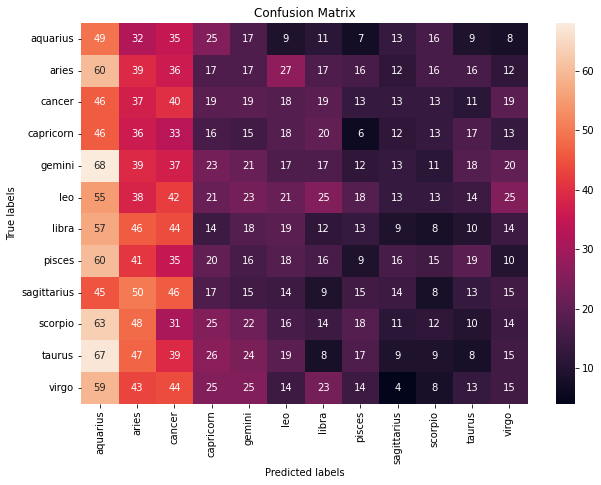

In [62]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);